<a href="https://colab.research.google.com/github/BANTURAKESH/Single-cell-Sequencing-Scanpy-/blob/main/Scanpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scanpy umap-learn anndata numpy scipy pandas matplotlib scrublet seaborn python-igraph louvain leidenalg

In [9]:
!pip install scanpy anndata matplotlib seaborn scikit-learn

In [6]:
import scanpy as sc
import anndata as ann
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import colors

# Global settings
sc.settings.verbosity = 3  # Verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.set_figure_params(scanpy=True)

In [7]:
sns.set_context(context='poster')

Raw Data → AnnData object → Quality Control → Normalization → HVG → PCA → Clustering → UMAP/tSNE → Marker Genes


1. Load the Data

In [10]:
adata = sc.datasets.pbmc3k()  # Replace with: adata = sc.read_h5ad('your_data.h5ad')
print(adata)

try downloading from url
https://falexwolf.de/data/pbmc3k_raw.h5ad
... this may take a while but only happens once


  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


In [8]:
adata = sc.read_h5ad('/content/data/pbmc3k_raw.h5ad')
print(adata)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/data/pbmc3k_raw.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
adata.shape

(2700, 32738)

In [ ]:
print('Total number of observations: {:d}'.format(adata.n_obs))

Total number of observations: 2700


In [ ]:
# Variables metadata (gene-level, e.g., gene names, HVGs)
adata.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', name='index', length=32738)

In [ ]:
#Observations metadata (cell-level, e.g., clusters, QC)
adata.obs

""
index
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1


In [ ]:
adata.var_names_make_unique()

In [ ]:
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', name='index', length=2700)

QUALITY CONTROL (QC)

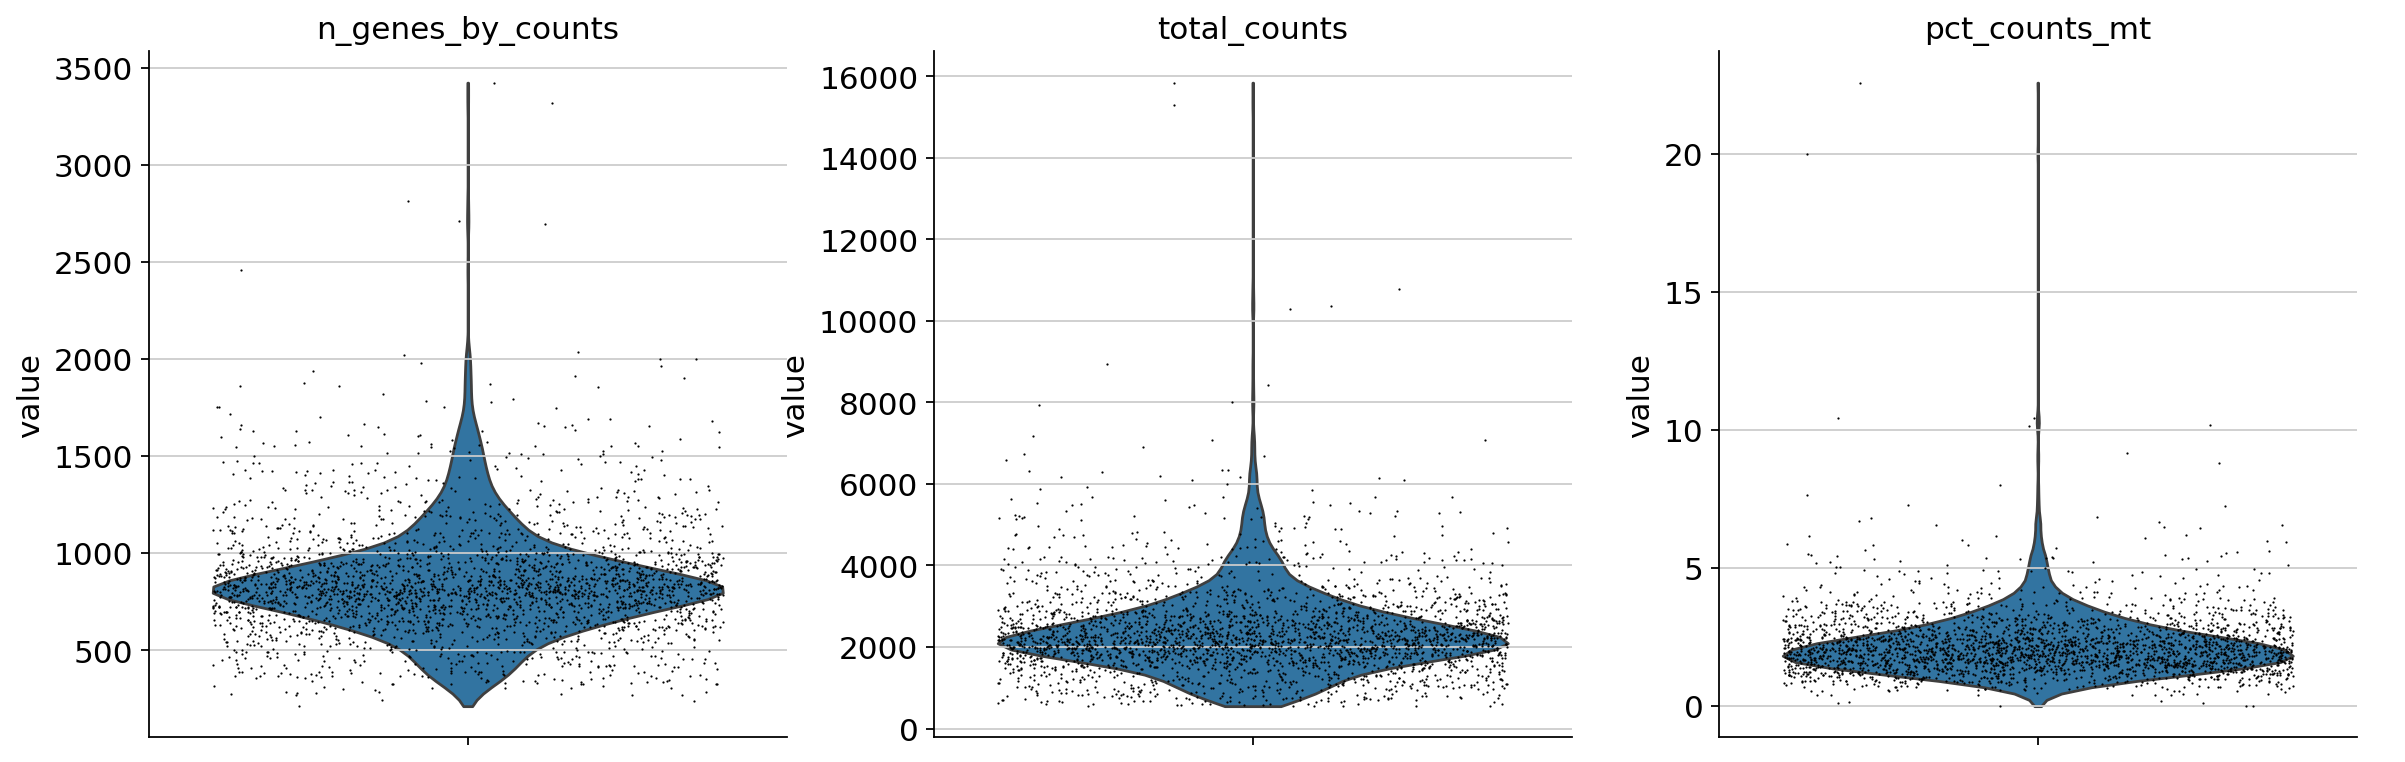

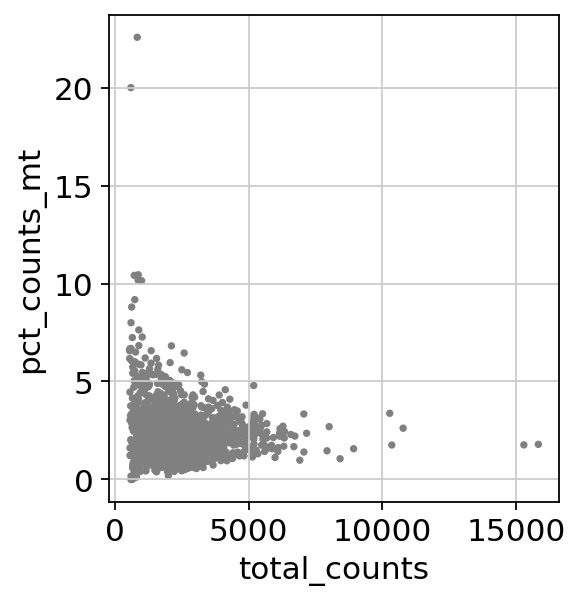

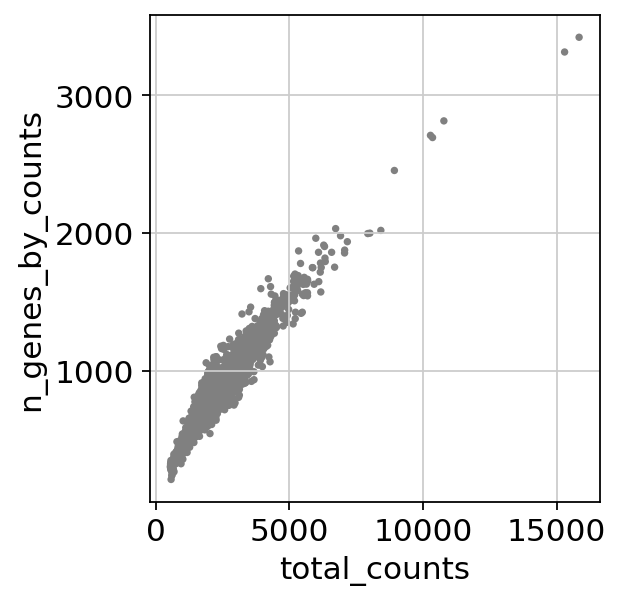

filtered out 19082 genes that are detected in less than 3 cells


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [ ]:
# Annotate mitochondrial genes
adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')

# Compute QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Plot QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

# Filter cells
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
adata = adata[adata.obs.total_counts < 20000, :]

# Filter genes
sc.pp.filter_genes(adata, min_cells=3)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.11/dist-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


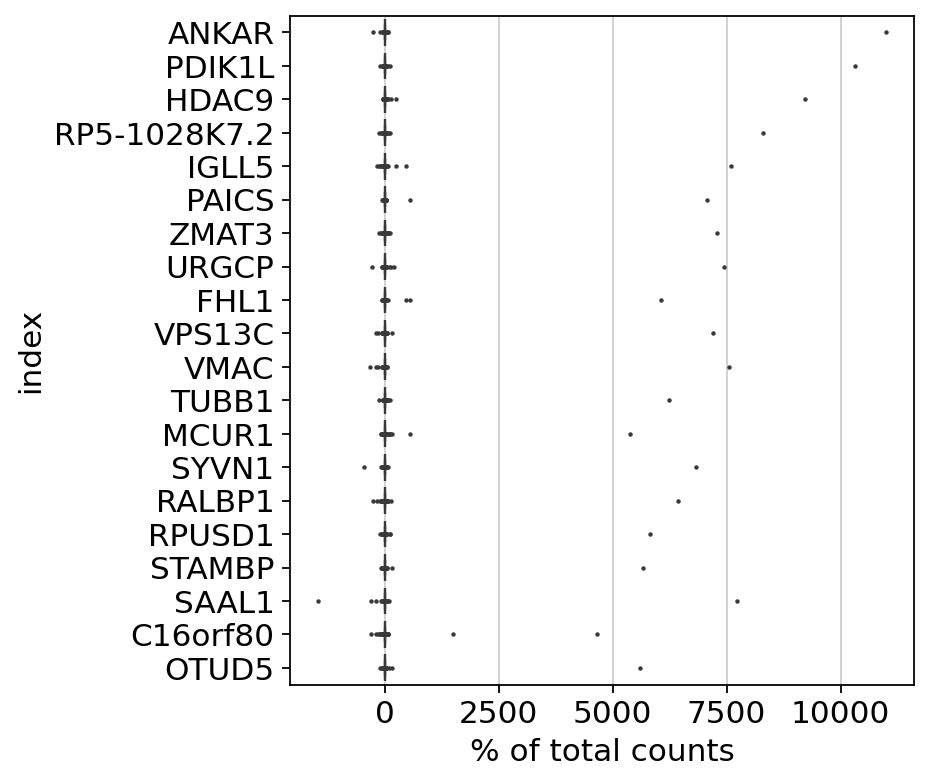

In [ ]:
# Checking for the Highly expressed genes(top-20)
sc.pl.highest_expr_genes(adata, n_top=20, )

NORMALIZATION & LOG TRANSFORMATION

In [ ]:
# Normalize per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize
sc.pp.log1p(adata)

# Store raw (for future use like marker identification)
adata.raw = adata

normalizing counts per cell
    finished (0:00:00)


IDENTIFY HIGHLY VARIABLE GENES (HVGs)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


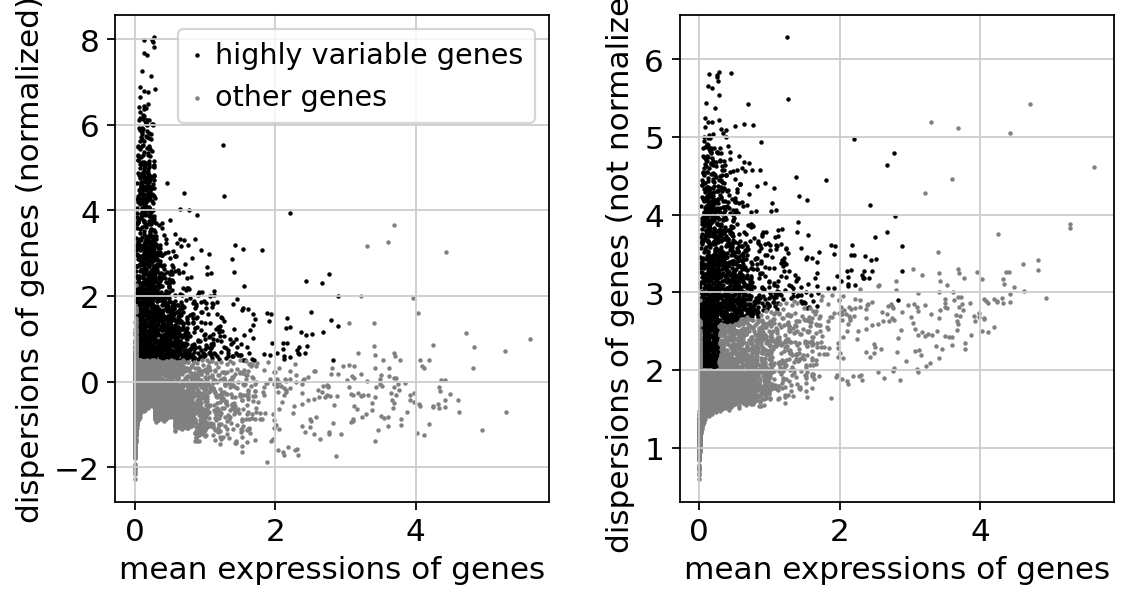

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Visualize HVGs
sc.pl.highly_variable_genes(adata)

# Subset to HVGs
adata = adata[:, adata.var.highly_variable]

In [ ]:
adata

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

SCALE & DIMENSION REDUCTION

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.11/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


computing PCA
    with n_comps=50
    finished (0:00:02)


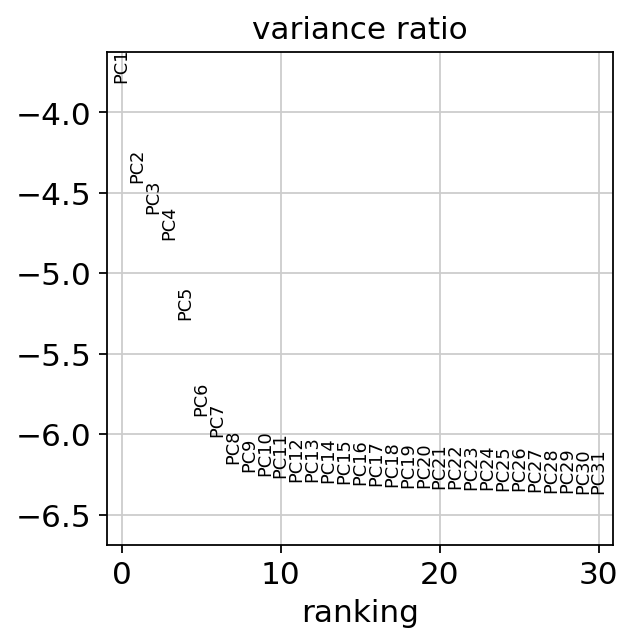

In [ ]:
# Scale data
sc.pp.scale(adata, max_value=10)

# PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)


NEIGHBORHOOD GRAPH & CLUSTERING

In [ ]:
!pip install igraph leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)
running Leiden clustering


<ipython-input-48-cd1074960741>:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)  # Tune resolution as needed


    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


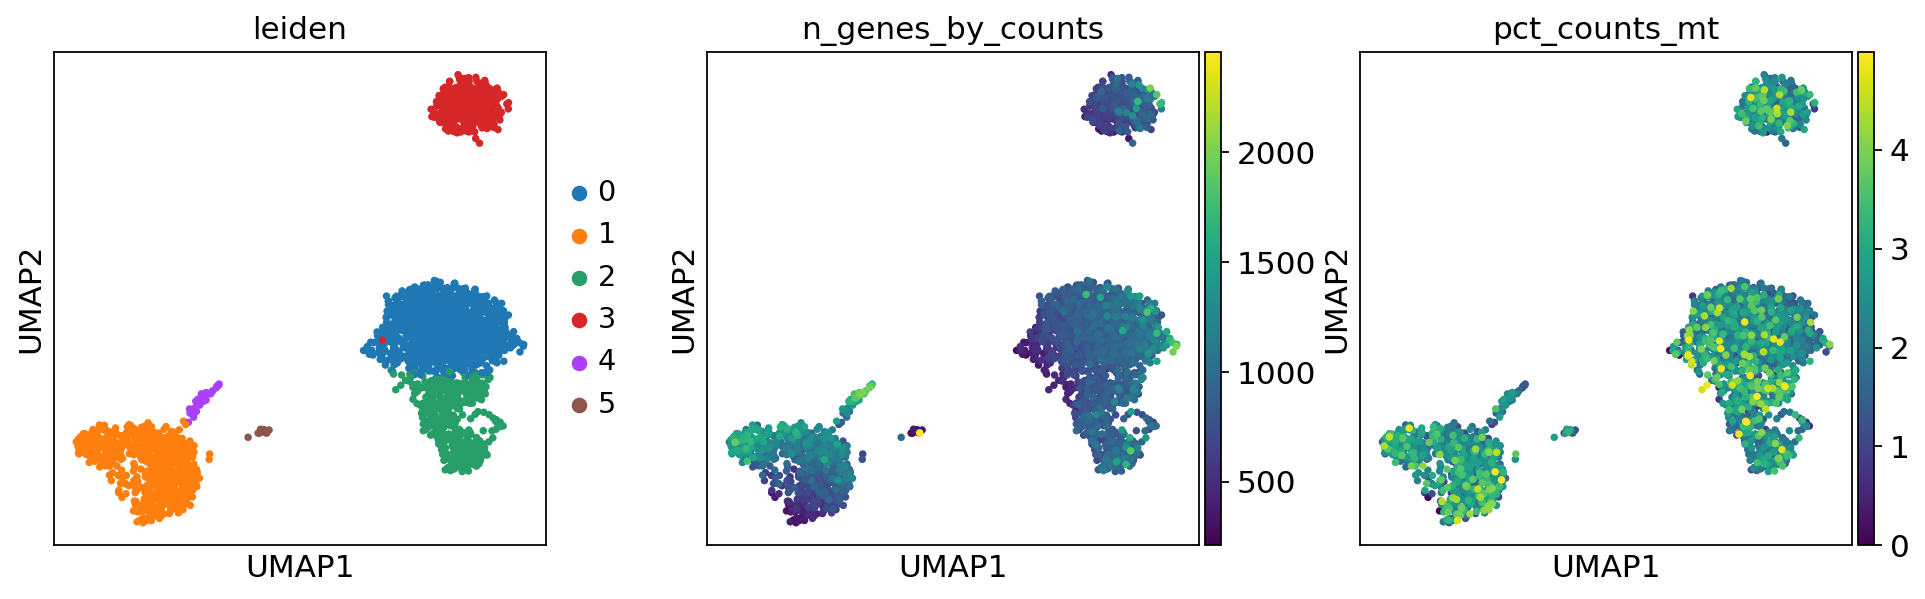

In [ ]:
# Compute neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# UMAP Embedding
sc.tl.umap(adata)

# Leiden clustering (robust alternative to Louvain)
sc.tl.leiden(adata, resolution=0.5)  # Tune resolution as needed

# Visualize UMAP
sc.pl.umap(adata, color=['leiden', 'n_genes_by_counts', 'pct_counts_mt'])


In [ ]:
adata

AnnData object with n_obs × n_vars = 2638 × 1826
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

MARKER GENE IDENTIFICATION

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


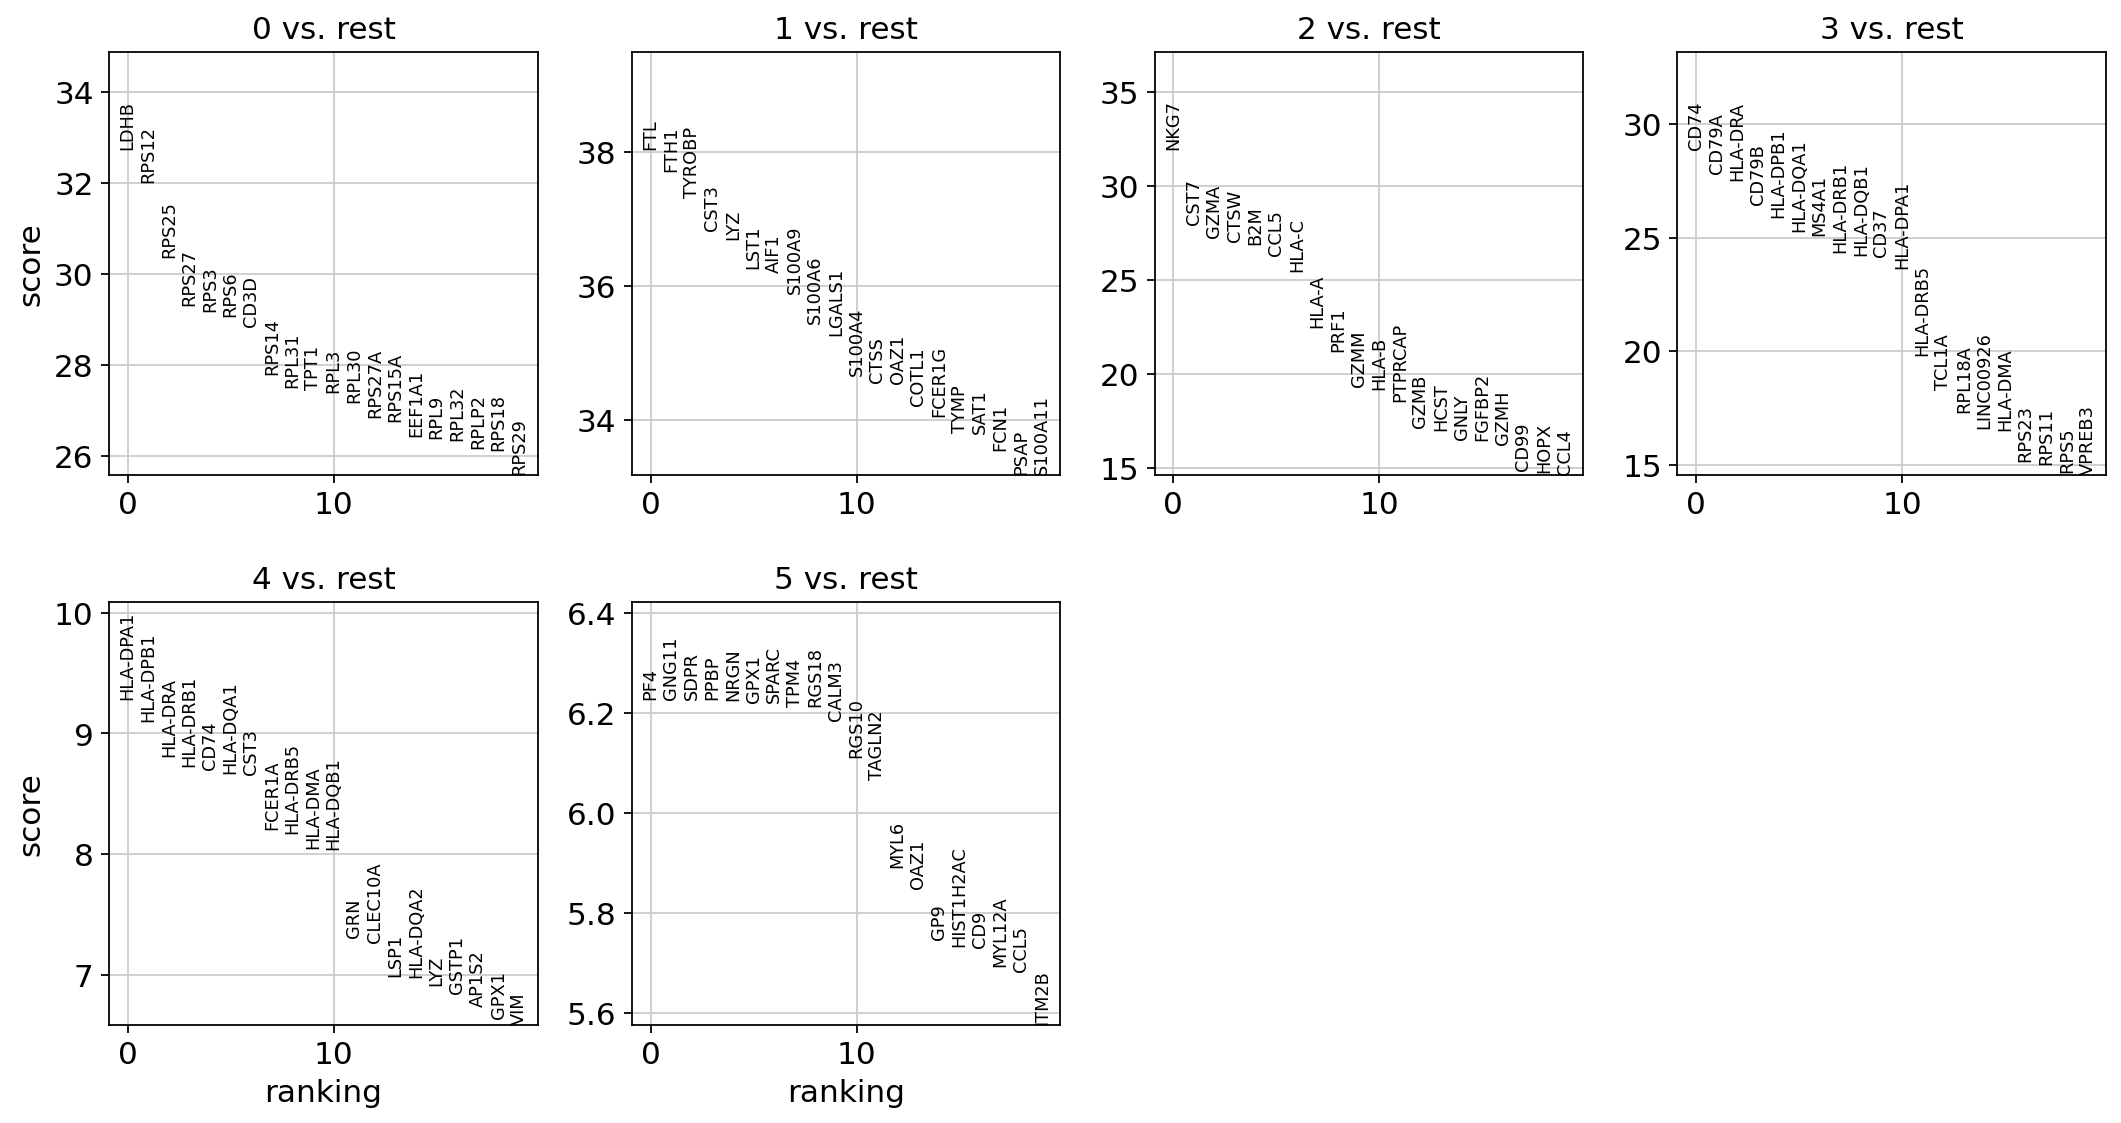

In [ ]:
# Rank marker genes
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

# Visualize top genes per cluster
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# Export marker genes to CSV
markers_df = sc.get.rank_genes_groups_df(adata, group=None)
markers_df.to_csv("marker_genes_all_clusters.csv", index=False)
